Natural language processing is the study of enabling computers to understand human languages. This field may involve teaching computers to automatically score essays, infer grammatical rules, or determine the emotions associated with text.


Converting text into numerical representation. This process will enable the computer to learn the grammatical rules. Here going to explore how to get from written text to a numerical representation,and use that representation to make predictions

In [1]:
import pandas as pd
import numpy as np
submissions =pd.read_csv("sel_hn_stories.csv")
submissions.columns=["submission_time", "upvotes", "url", "headline"]

The data set here i am going to use from the hacker news. It's a community where users can submit articles, and other users can upvote those articles.The data set consists of submissions users made to Hacker News from 2006 to 2015.Here i am downloaded the dataset from DATAQUEST

Contains four columns:

- submission_time - When the article was submitted
- upvotes - The number of upvotes the article received
- url - The base URL of the article
- headline - The article's headline

In [2]:
submissions.head()


,submission_time,upvotes,url,headline
0,2010-02-17T16:57:59Z,1,blog.jonasbandi.net,Software: Sadly we did adopt from the construc...
1,2014-02-04T02:36:30Z,1,blogs.wsj.com,Google’s Stock Split Means More Control for L...
2,2011-10-26T07:11:29Z,1,threatpost.com,SSL DOS attack tool released exploiting negoti...
3,2011-04-03T15:43:44Z,67,algorithm.com.au,Immutability and Blocks Lambdas and Closures
4,2013-01-13T16:49:20Z,1,winmacsofts.com,Comment optimiser la vitesse de Wordpress?


In [3]:
submissions.isnull().sum()

submission_time      0
upvotes              0
url                189
headline            10
dtype: int64

In [4]:
submissions = submissions.dropna()

#### 3. Tokenizing the Headlines

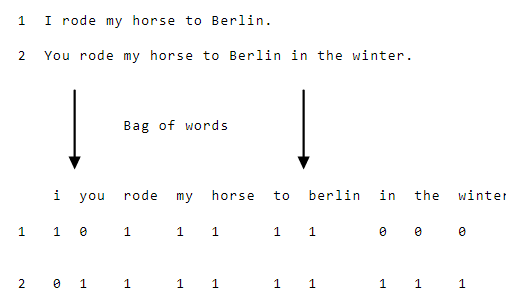

image:DATAQUEST

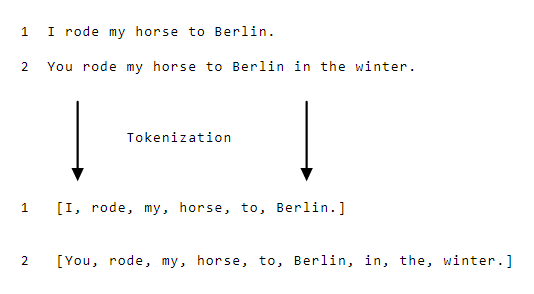


image:DATAQUEST

Going to split each sentence or tokens from the column "headlines"

In [5]:
tokenized_headlines = []

for i in submissions['headline']:
    tokenized_headlines.append(i.split())

By preprocessing we can the tokens we can increase the accuracy

In [6]:
punctuation = [",", ":", ";", ".", "'", '"', "’", "?", "/", "-", "+", "&", "(", ")"]
clean_tokenized = []
for item in tokenized_headlines:
    tokens = []
    for token in item:
        token = token.lower()
        for punc in punctuation:
            token = token.replace(punc, "")
        tokens.append(token)
    clean_tokenized.append(tokens)
            

From the cleaned_tokens we can converting sentences to numerical representation by retrieve all the unique words from all of the headlines and create a matrix and will assign those words as the column headers.

By itialize all of the values in the matrix to 0 using a pandas dataframe

In [7]:
import numpy as np
unique_tokens = []
single_tokens = []

for tokens in clean_tokenized:
    for token in tokens:
        if token not in single_tokens:
            single_tokens.append(token)
        elif token in single_tokens and token not in unique_tokens:
            unique_tokens.append(token)
             
counts = pd.DataFrame(0, index=np.arange(len(clean_tokenized)),columns=unique_tokens)

#### Counting token occurance

In [8]:
for ind,item in enumerate(clean_tokenized):
    for token in item:
        if token in unique_tokens:
            counts.iloc[ind][token] += 1

In [10]:
counts.head(5)

,and,for,as,you,is,the,split,good,how,what,...,frameworks,animated,walks,auctions,clouds,hammer,autonomous,vehicle,crowdsourcing,disaster
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Too many columns will cause the model to fit to noise instead of the signal in the data. Two kind of features that will reduce prediction accuracy.Features that occur only a few times will cause overfitting, because the model doesn't have enough information to accurately decide whether they're important. These features will probably correlate differently with upvotes in the test set and the training set.Features that occur too many times can also cause issues

To reduce the number of features and enable the linear regression model to make better predictions need to remove columns.

In [11]:
word_counts = counts.sum(axis=0)

counts =counts.loc[:,(word_counts >=5 ) & (word_counts <=100)]

In [12]:
counts.head()

,as,you,good,what,de,amazon,cloud,at,google,back,...,uk,preview,compiler,manager,sharing,sale,competition,diet,reasons,nike
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


splittin the data in to train and test set

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(counts, submissions["upvotes"], test_size=0.2, random_state=1)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math im
clf = LinearRegression()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
mse = mean_squared_error(predictions, y_test)
rmse = sqrt(mse)

In [20]:
mse

2651.145705668969

In [18]:
rmse

51.489277579598735

 This means that our average error is 51.5 upvotes away from the true value

In [ ]:
#### Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200, random_state=1, min_samples_leaf=2)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
mse = mean_squared_error(predictions, y_test)
rmse = sqrt(mse)

In [32]:
mse

1934.5232142857142

In [33]:
rmse

43.98321514266225

By using Random Forest we got the average error is 43.9 upvotes away from the true